In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.svm import SVC, SVR # SVC support vector classifier, SVR support vector regressor
from sklearn.svm import LinearSVC, LinearSVR


In [2]:
import xgboost as xgb
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
import os

In [4]:
# Import data
X=pd.read_csv("Data preprocess/x.csv",header=0, index_col=0)
y=pd.read_csv("Data preprocess/y.csv",header=0, index_col=0)
y=pd.Series(y["Inflation"])
y,X
train_ratio=0.7
n_train = int(len(X)*0.7) #every 200 months as a training window
n_records = len(X)
n_forecast = n_records-n_train
train_ratio=0.7


# ARIMA Model

In [5]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid

p_values = range(0, 5)
q_values = range(0, 5) 
d_values = range(0, 5) 

Y = pd.Series(y)

Y_train = Y[:261]
Y_test = Y[261:]

param_grid = list(itertools.product(p_values, d_values, q_values))

best_model = None
best_aic = np.inf
best_params = None

for params in param_grid:
    try:
        model = ARIMA(Y, order=params)
        model_fit = model.fit()
        aic = model_fit.aic

        if aic < best_aic:
            best_aic = aic
            best_model = model_fit
            best_params = params
    except:
        continue
        
print(best_model.summary())

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  war

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  373
Model:                 ARIMA(0, 0, 2)   Log Likelihood                   1.597
Date:                Sat, 02 Dec 2023   AIC                              4.806
Time:                        15:05:02   BIC                             20.492
Sample:                             0   HQIC                            11.035
                                - 373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2081      0.022      9.446      0.000       0.165       0.251
ma.L1          0.5514      0.033     16.827      0.000       0.487       0.616
ma.L2          0.1096      0.048      2.293      0.0

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

#Predict variables using rolling window
n_train = 261  # Number of training samples
n_records = len(Y)
forecasts = []
j = 0
train_errors = []

for i in range(n_train, n_records):
    train_data = Y[j:i]
    test_data = Y[i:i+1]

    #Fit the ARIMA model with the best parameters
    model = ARIMA(train_data, order=best_params)
    model_fit = model.fit()

    #Forecast using the ARIMA model
    forecast = model_fit.forecast(steps=1)
    forecasts.extend(forecast)
    
    train_error = np.abs(train_data[-1] - forecast)
    train_errors.append(train_error)

forecasts




/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

[0.21078633052270274,
 0.1501286200872463,
 0.21982506599056068,
 0.18724771507459115,
 0.19903745612096158,
 0.16621263250758206,
 0.167300344370991,
 0.10177950011679404,
 0.13581471335126244,
 0.11059086209615451,
 0.029951408445207717,
 -0.007762007545554533,
 -0.1798717572468285,
 0.3520162597366931,
 0.18682027966425,
 0.14215985689822572,
 0.2801625018138908,
 0.20527410566118479,
 0.16752399081793848,
 0.10101555870810687,
 0.006898669343710473,
 0.20889752936030834,
 0.15079964821819686,
 0.04766865911364068,
 0.11734479065729822,
 0.04830425802339511,
 0.30096946508025163,
 0.2513031620111236,
 0.18641057539261802,
 0.23318846267207452,
 0.04881991068733968,
 0.2327724733374347,
 0.2129599010327852,
 0.20034393715520726,
 0.14654642777340465,
 0.23438833149970922,
 0.28311310748713725,
 0.13839246439565642,
 0.08248298935478907,
 0.19288622554778181,
 0.051352081103149844,
 0.17089613039102042,
 0.11596096530504874,
 0.3105828907972583,
 0.31033177035385956,
 0.08461863789725

In [7]:
#Calculate the training error
mse = np.mean(np.square(train_errors))
ARIMA_train_error = np.sqrt(mse)


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


pd.options.display.max_rows=300
result3 = pd.DataFrame({'Actual inflation': Y_test, 'ARIMA Predicted inflation': forecasts}, columns=['Actual inflation', 'ARIMA Predicted inflation'])
result3

mse_regression = mean_squared_error(Y_test, forecasts)
rmse_regression =  math.sqrt(mse_regression)
print("Mean Squared Error:", mse_regression)
print("Root Mean Squared Error:", rmse_regression)

r_squared_arima = r2_score(result3['Actual inflation'], result3['ARIMA Predicted inflation'])
print("R-squared:", r_squared_arima)
print(result3.corr())


Mean Squared Error: 0.059342273789961326
Root Mean Squared Error: 0.24360269659829573
R-squared: 0.30850947682811625
                           Actual inflation  ARIMA Predicted inflation
Actual inflation                   1.000000                   0.567986
ARIMA Predicted inflation          0.567986                   1.000000


# Linear Regression with Regularization

In [105]:
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 19, random_state=1)), 
               ('elasticnet', ElasticNet(alpha=0.4,l1_ratio=0, tol=0.5))
              ]

pipeline_final = Pipeline(steps_final)

In [10]:
start=time.time()    
   
n_train = int(len(X)*train_ratio)

n_records = len(X)

y_test_list = []
    
y_ols_pred_list = []

y_train_list = []

y_train_pred_list = []

j = 0


for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_ols_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)


    j += 1
    
end=time.time()
score_rmse = metrics.mean_squared_error(y_test_list, y_ols_pred_list, squared=False)
OLS_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)

print("Running Time:", end - start)
print("Test error:",score_rmse)
print("Train error:", OLS_train_error)

Running Time: 2.2226040363311768
Test error: 0.25927532748153265
Train error: 0.22431565104925713


In [11]:
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual inflation': y[-n_forecast:], "ARIMA_Predicted":forecasts,'OLS_Predicted': y_ols_pred_list}, columns=['Actual inflation', "ARIMA_Predicted", 'OLS_Predicted'])
result

,Actual inflation,ARIMA_Predicted,OLS_Predicted
sasdate,,,
2014-01-02,0.110017,0.210786,0.093974
2014-01-03,0.203997,0.150129,0.173174
2014-01-04,0.186245,0.219825,0.186376
2014-01-05,0.190120,0.187248,0.213877
2014-01-06,0.132026,0.199037,0.132351
2014-01-07,0.112485,0.166213,0.202048
2014-01-08,-0.016001,0.167300,0.231942
2014-01-09,0.007159,0.101780,0.083693
2014-01-10,-0.019793,0.135815,0.180617


# SVM Regressor

In [12]:
# Pipeline

# Steps
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 14, random_state=1)),
               ('svr', LinearSVR(epsilon=0.15,C=19, dual=True, random_state=1, max_iter=1000000))
              ]

pipeline_final = Pipeline(steps_final)

In [13]:
start=time.time()    
   
n_train = int(len(X)*train_ratio)

n_records = len(X)

y_test_list = []
    
y_pred_list = []

y_train_pred_list = []

y_train_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
SVR_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)
end=time.time()

print("Running Time:", end - start)
print(score_rmse)
print(SVR_train_error)

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWa

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWa

Running Time: 158.38628578186035
0.2682119438642626
0.23521658955688532


In [14]:
pd.options.display.max_rows=300
result["SVR_Predicted"] = y_pred_list
result.index = pd.DatetimeIndex(result.index).strftime("%d-%y")
result

,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted
sasdate,,,,
02-14,0.110017,0.210786,0.093974,0.110716
03-14,0.203997,0.150129,0.173174,0.183542
04-14,0.186245,0.219825,0.186376,0.202162
05-14,0.190120,0.187248,0.213877,0.218022
06-14,0.132026,0.199037,0.132351,0.139749
07-14,0.112485,0.166213,0.202048,0.222046
08-14,-0.016001,0.167300,0.231942,0.247674
09-14,0.007159,0.101780,0.083693,0.083998
10-14,-0.019793,0.135815,0.180617,0.212074


# XGBoost

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

In [23]:
#Perform rolling window prediction
#Rolling window = 1
start=time.time()    

n_train = int(len(X)*train_ratio)

n_records = len(X)

y_XGB_test_list = []
    
y_XGB_pred_list = []

y_train_pred_list = []

y_train_list=[]

y_test_list = []

j = 0




pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

# Best parameters
best_params = {'pca__n_components': 0.95, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

# Set the best parameters in the pipeline
pipeline_final.set_params(**best_params)

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_XGB_pred = model.predict(X_test)
    
    y_XGB_pred_list.extend(y_XGB_pred)
    
    y_XGB_test_list.extend(y_test)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)
    
    y_test_list.extend(y_test)

    j += 1

    
end=time.time()

print("Running Time:", end - start)

score_rmse = metrics.mean_squared_error(y_test_list, y_XGB_pred_list, squared=False)
XGB_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)

Running Time: 27.009893894195557


In [24]:
print(score_rmse,XGB_train_error)
pd.options.display.max_rows=300
result["XGBoost_Predicted"] = y_XGB_pred_list

result

0.27001735507113056 0.22284820031943034


,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted,XGBoost_Predicted,Randomforest_Predicted
sasdate,,,,,,
02-14,0.110,0.211,0.094,0.111,0.199,0.206
03-14,0.204,0.150,0.173,0.184,0.176,0.166
04-14,0.186,0.220,0.186,0.202,0.203,0.216
05-14,0.190,0.187,0.214,0.218,0.199,0.190
06-14,0.132,0.199,0.132,0.140,0.199,0.173
07-14,0.112,0.166,0.202,0.222,0.202,0.187
08-14,-0.016,0.167,0.232,0.248,0.187,0.128
09-14,0.007,0.102,0.084,0.084,0.191,0.211
10-14,-0.020,0.136,0.181,0.212,0.182,0.156


# Random Forest

In [25]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=8, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=100, min_samples_leaf=1, max_features=1, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(X)*train_ratio)  

n_records = len(X)

y_test_list = []
    
y_ranforest_pred_list = []

y_train_pred_list = []

y_train_list = []


j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_ranforest_pred_list.extend(y_pred)
    
    y_train_pred_list.extend(model.predict(X_train))
    
    y_train_list.extend(y_train)
    
    y_test_list.extend(y_test)

    j += 1

score_rmse = metrics.mean_squared_error(y_test_list, y_ranforest_pred_list, squared=False)
RF_train_error = metrics.mean_squared_error(y_train_list, y_train_pred_list, squared=False)
end=time.time()

print("Running Time:", end - start)
print(score_rmse)
print(RF_train_error)

Running Time: 21.43731999397278
0.27639779114739743
0.09742755805612101


In [26]:
pd.options.display.max_rows=300
result["Randomforest_Predicted"] = y_ranforest_pred_list
pd.options.display.float_format = '{:.3f}'.format
result

,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted,XGBoost_Predicted,Randomforest_Predicted
sasdate,,,,,,
02-14,0.110,0.211,0.094,0.111,0.199,0.206
03-14,0.204,0.150,0.173,0.184,0.176,0.166
04-14,0.186,0.220,0.186,0.202,0.203,0.216
05-14,0.190,0.187,0.214,0.218,0.199,0.190
06-14,0.132,0.199,0.132,0.140,0.199,0.173
07-14,0.112,0.166,0.202,0.222,0.202,0.187
08-14,-0.016,0.167,0.232,0.248,0.187,0.128
09-14,0.007,0.102,0.084,0.084,0.191,0.211
10-14,-0.020,0.136,0.181,0.212,0.182,0.156


# Result summary

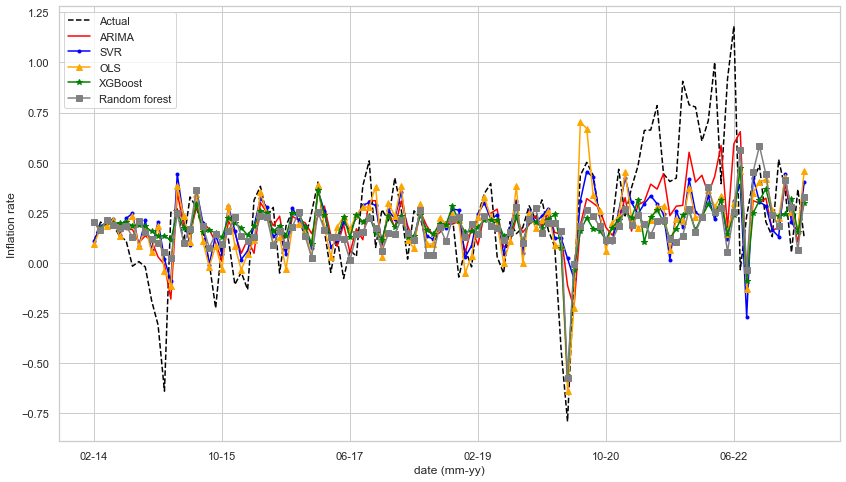

In [27]:
(result["Actual inflation"]).plot(color="black",linestyle="--")
(result["ARIMA_Predicted"]).plot(color="red")
(result["SVR_Predicted"]).plot(color="blue",marker=".")
(result["OLS_Predicted"]).plot(color="orange",marker="^")
(result["XGBoost_Predicted"]).plot(color="green",marker="*")
(result["Randomforest_Predicted"]).plot(color="grey",marker="s")
plt.legend(["Actual","ARIMA","SVR","OLS","XGBoost","Random forest"])
plt.xlabel("date (mm-yy)")
plt.ylabel("Inflation rate")
plt.show()

In [28]:
# Correlation Matrix for different models
pd.set_option("display.precision", 3)
result.corr()

,Actual inflation,ARIMA_Predicted,OLS_Predicted,SVR_Predicted,XGBoost_Predicted,Randomforest_Predicted
Actual inflation,1.000,0.568,0.488,0.410,0.413,0.376
ARIMA_Predicted,0.568,1.000,0.699,0.747,0.631,0.657
OLS_Predicted,0.488,0.699,1.000,0.846,0.758,0.763
SVR_Predicted,0.410,0.747,0.846,1.000,0.597,0.641
XGBoost_Predicted,0.413,0.631,0.758,0.597,1.000,0.863
Randomforest_Predicted,0.376,0.657,0.763,0.641,0.863,1.000


In [29]:
# Summary of test evaluation measures
Statistics = pd.DataFrame({'R2': metrics.r2_score(result["Actual inflation"],result["OLS_Predicted"]), 'RMSE': metrics.mean_squared_error(result["Actual inflation"],result["OLS_Predicted"],squared=False),"Correlation":result.corr().iloc[0,1]},index=["OLS"])
Statistics.loc["ARIMA",:]= [metrics.r2_score(result["Actual inflation"],result["ARIMA_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["ARIMA_Predicted"],squared=False),result.corr().iloc[0,2]]
Statistics.loc["SVR",:]= [metrics.r2_score(result["Actual inflation"],result["SVR_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["SVR_Predicted"],squared=False),result.corr().iloc[0,3]]
Statistics.loc["XGBoost",:]= [metrics.r2_score(result["Actual inflation"],result["XGBoost_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["XGBoost_Predicted"],squared=False),result.corr().iloc[0,4]]
Statistics.loc["Random Forest",:]= [metrics.r2_score(result["Actual inflation"],result["Randomforest_Predicted"]),metrics.mean_squared_error(result["Actual inflation"],result["Randomforest_Predicted"],squared=False),result.corr().iloc[0,5]]
Statistics["Train error"]=[ARIMA_train_error,OLS_train_error,SVR_train_error,XGB_train_error,RF_train_error]
Statistics["Test to train error ratio"]=Statistics["RMSE"]/Statistics["Train error"]
Statistics

,R2,RMSE,Correlation,Train error,Test to train error ratio
OLS,0.217,0.259,0.568,0.167,1.555
ARIMA,0.309,0.244,0.488,0.224,1.086
SVR,0.162,0.268,0.410,0.235,1.140
XGBoost,0.150,0.270,0.413,0.223,1.212
Random Forest,0.110,0.276,0.376,0.097,2.837
